In [1]:
# Yihao Zhong Larry, yz7654, date: 02/16/2024
# 

In [ ]:
# pip install arff

# !!! plesae install the arff package before running the code if you haven't done so

## Problem 1 -  Algorithmic Performance Scaling 

### 1.1. Summarize the attribute

https://www.openml.org/search?type=data&sort=qualities.NumberOfClasses&status=active&qualities.NumberOfInstances=between_100000_1000000&id=1509 (ID: 1509)

Casale, P. Pujol, O. and Radeva, P. 'Personalization and user verification in wearable systems using biometric walking patterns' Personal and Ubiquitous Computing, 16(5), 563-580, 2012

**User Identification From Walking Activity Data Set**

The dataset collects data from an Android smartphone positioned in the chest pocket. Accelerometer Data are collected from 22 participants walking in the wild over a predefined path. The dataset is intended for Activity Recognition research purposes. It provides challenges for identification and authentication of people using motion patterns.

Attribute Information

Time-step, x acceleration, y acceleration, z acceleration
Target: User ID.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149332 entries, 0 to 149331
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      149332 non-null  float64
 1   V2      149332 non-null  float64
 2   V3      149332 non-null  float64
 3   V4      149332 non-null  float64
 4   Class   149332 non-null  object 
dtypes: float64(4), object(1)
memory usage: 5.7+ MB
None
         V1       V2      V3      V4 Class
0  0.000000 -1.83870  5.9385  4.2495     1
1  0.029786 -1.60720  5.5980  4.8216     1
2  0.060669 -0.84446  5.8976  6.6331     1
3  0.089905 -0.61292  7.7772  6.7421     1
4  0.120150 -1.07600  9.5342  6.7829     1


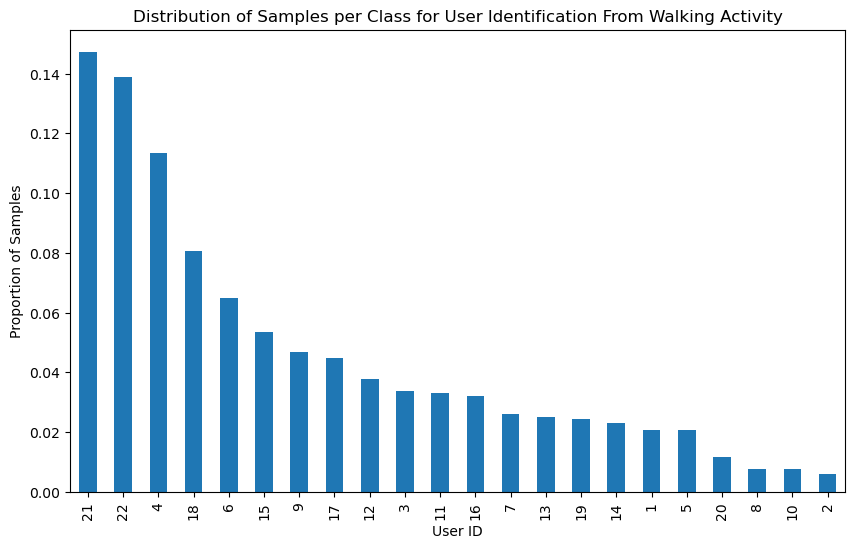

Number of features: 4
Number of instances: 149332
Number of classes: 22
Number of numerical features: 4
Number of categorical features: 0


In [44]:
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt

data, meta = arff.loadarff('php3CTpvq.arff')
df_new = pd.DataFrame(data)

str_df_new = df_new.select_dtypes([object])
str_df_new = str_df_new.stack().str.decode('utf-8').unstack()


for col in str_df_new:
    df_new[col] = str_df_new[col]

print(df_new.info())

print(df_new.head())

num_features_new = df_new.shape[1] - 1  # Exclude target variable
num_instances_new = df_new.shape[0]
num_classes_corrected = df_new['Class'].nunique()
class_distribution_corrected = df_new['Class'].value_counts(normalize=True)


plt.figure(figsize=(10, 6))
class_distribution_corrected.plot(kind='bar')
plt.title('Distribution of Samples per Class for User Identification From Walking Activity')
plt.xlabel('User ID')
plt.ylabel('Proportion of Samples')
plt.show()


num_features_corrected = df_new.shape[1] - 1  
num_instances_corrected = df_new.shape[0]
num_numerical_features_corrected = df_new.select_dtypes(include=['float64', 'int64']).shape[1]
num_categorical_features_corrected = 0 

print("Number of features: {}\nNumber of instances: {}\nNumber of classes: {}\nNumber of numerical features: {}\nNumber of categorical features: {}"
.format(num_features_corrected, num_instances_corrected, num_classes_corrected, num_numerical_features_corrected, num_categorical_features_corrected))


The dataset ( V1 being timestep, V2 being X-axis, V2 being Y-axis, V3 being Z-axis ) is slightly imbalanced across the 22 classes (22 individuals). No. 21, 22, and 4 have more 10% of the dataset, and there are 6 individuals have more than 5% of the dataset, and 10 individuals have less than 3% of the dataset. Perfectly, each class will have around ~5% of the dataset (100% / 22).

### 1.2. 

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import pandas as pd 
import time
import numpy as np

X = df_new.drop('Class', axis=1)
y = df_new['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


results = {
    "Training Size (%)": [],
    "Model": [],
    "Training Time (s)": [],
    "Accuracy (%)": []
}

def train_evaluate_model(model, X_train_sub, y_train_sub, X_test, y_test):
    start_time = time.time()
    model.fit(X_train_sub, y_train_sub)
    training_time = time.time() - start_time
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return training_time, accuracy

training_sizes = np.linspace(0.1, 1.0, 10)  

for size in training_sizes:
    print(f"Training size: {size * 100:.0f}%")

    if size < 1.0:
        X_train_sub, _, y_train_sub, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)
    else:
        X_train_sub = X_train
        y_train_sub = y_train
    
    # Decision Tree Classifier
    dt_classifier = DecisionTreeClassifier(random_state=42)
    dt_training_time, dt_accuracy = train_evaluate_model(dt_classifier, X_train_sub, y_train_sub, X_test, y_test)
    results["Training Size (%)"].append(size * 100)
    results["Model"].append("Decision Tree")
    results["Training Time (s)"].append(dt_training_time)
    results["Accuracy (%)"].append(dt_accuracy * 100)
    print(f"Accuracy: {dt_accuracy * 100:.2f}%")
    
    # Gradient Boosting Classifier
    gb_classifier = GradientBoostingClassifier(random_state=42)
    gb_training_time, gb_accuracy = train_evaluate_model(gb_classifier, X_train_sub, y_train_sub, X_test, y_test)
    results["Training Size (%)"].append(size * 100)
    results["Model"].append("Gradient Boosting")
    results["Training Time (s)"].append(gb_training_time)
    results["Accuracy (%)"].append(gb_accuracy * 100)
    print(f"Accuracy: {gb_accuracy * 100:.2f}%")


results_df = pd.DataFrame(results)
print(results_df)


Training size: 10%
Accuracy: 50.56%
Accuracy: 53.81%
Training size: 20%
Accuracy: 53.58%
Accuracy: 55.27%
Training size: 30%
Accuracy: 54.42%
Accuracy: 56.17%
Training size: 40%
Accuracy: 55.29%
Accuracy: 56.65%
Training size: 50%
Accuracy: 56.14%
Accuracy: 56.74%
Training size: 60%
Accuracy: 56.75%
Accuracy: 56.78%
Training size: 70%
Accuracy: 56.83%
Accuracy: 56.97%
Training size: 80%
Accuracy: 57.51%
Accuracy: 57.11%
Training size: 90%
Accuracy: 57.94%
Accuracy: 57.07%
Training size: 100%
Accuracy: 58.09%
Accuracy: 56.87%
    Training Size (%)              Model  Training Time (s)  Accuracy (%)
0                10.0      Decision Tree           0.064552     50.557471
1                10.0  Gradient Boosting          29.062380     53.811899
2                20.0      Decision Tree           0.133165     53.584223
3                20.0  Gradient Boosting          57.053126     55.271705
4                30.0      Decision Tree           0.204654     54.424616
5                30.0  Gr

### 1.3. 

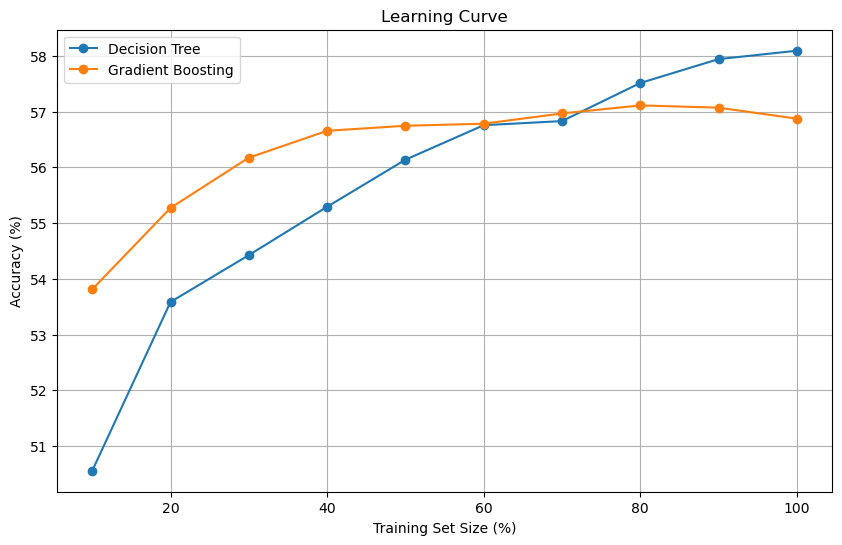

In [20]:
import matplotlib.pyplot as plt

def plot_learning_curve(results_df):

    dt_results = results_df[results_df['Model'] == 'Decision Tree']
    gb_results = results_df[results_df['Model'] == 'Gradient Boosting']


    plt.figure(figsize=(10, 6))
    plt.plot(dt_results['Training Size (%)'], dt_results['Accuracy (%)'], label='Decision Tree', marker='o')
    plt.plot(gb_results['Training Size (%)'], gb_results['Accuracy (%)'], label='Gradient Boosting', marker='o')
    plt.title('Learning Curve')
    plt.xlabel('Training Set Size (%)')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid(True)
    plt.show()


plot_learning_curve(results_df)


### 1.4.

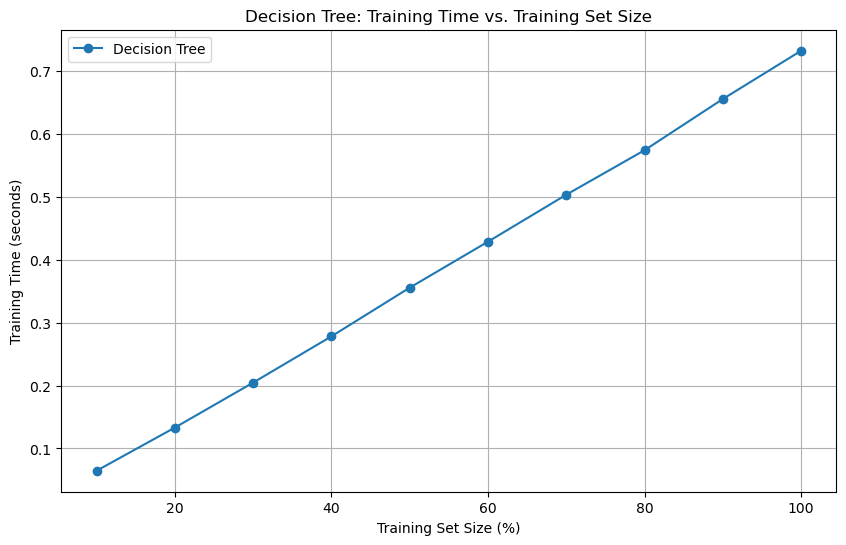

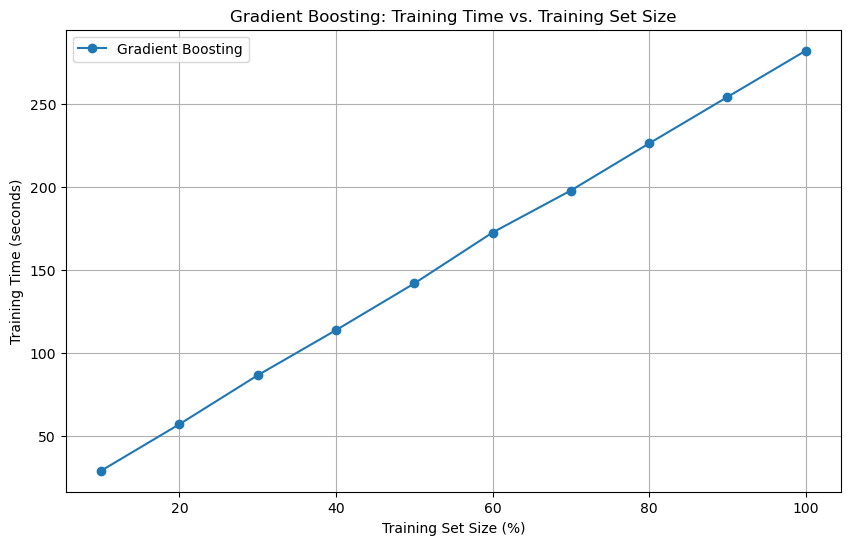

In [21]:
import matplotlib.pyplot as plt

def plot_training_time(results_df):

    dt_results = results_df[results_df['Model'] == 'Decision Tree']
    gb_results = results_df[results_df['Model'] == 'Gradient Boosting']


    plt.figure(figsize=(10, 6))
    plt.plot(dt_results['Training Size (%)'], dt_results['Training Time (s)'], label='Decision Tree', marker='o')
    plt.title('Decision Tree: Training Time vs. Training Set Size')
    plt.xlabel('Training Set Size (%)')
    plt.ylabel('Training Time (seconds)')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(gb_results['Training Size (%)'], gb_results['Training Time (s)'], label='Gradient Boosting', marker='o')
    plt.title('Gradient Boosting: Training Time vs. Training Set Size')
    plt.xlabel('Training Set Size (%)')
    plt.ylabel('Training Time (seconds)')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_training_time(results_df)


### 1.5.

**Accuracy Observation:**

- The learning curve shows that the accuracy of both the Decision Tree and Gradient Boosting classifiers improves as the training data size increases.

- The Gradient Boosting classifier has better accuracy across training sizes smaller than 70% compared to the Decision Tree classifier. After 70% of sub-training set, which is usually more general cases, Decision Tree performs much better than GB. 

**Training Time Observation:**

- For the Decision Tree classifier, the training time increases almost linearly (but not actually) with the size of the training set. This is typical for Decision Trees since the complexity of tree-building scales with the number of samples.

- The training time for the Gradient Boosting classifier also almost increases linearly but at a much steeper rate than the Decision Tree classifier. This indicates that Gradient Boosting is more computationally intensive, likely due to the iterative nature of boosting where each tree builds upon the previous ones.

**Overall Performance Comparison:**

- Gradient Boosting offers a higher accuracy only in insufficient training set scenarios. Decision Tree classifier is better in more standard train-test split setting.

- The Decision Tree classifier is much faster to train than Gradient Boosting, which might make it a preferable choice in scenario where training speed is important.

## Problem 2 - Precision Recall ROC

### 2.1. ROC and PR

 #### 2.1. Written Answer
 
 True negatives (TNs) do matter for ROC curves. In the ROC space, both true negatives and false positives are taken into account to compute the False Positive Rate (FPR), which is plotted on the x-axis against the True Positive Rate (TPR) on the y-axis. The ROC curve gives us a full undertstand of both types of errors (false positives and false negatives) in relation to all classifications made by the model.

In contrast, Precision-Recall (PR) curves focus on the performance of the positive class only. True negatives (TNs) do not matter on PR curves. Precision consider true positives and false positives but not true negatives, meaning the model's accuracy in predicting positive instances out of all predicted as positive. Recall (or TPR) measures the model's ability to find all the positive instances. Therefore, true negatives do not influence the PR curve, making PR curves useful in with a skewed class distribution where the negative class outnumbers (>=) the positive class.

"Each point on the ROC curve corresponds to a unique point on the PR curve" This indicating a one-to-one correspondence (mapping) between them. This relationship means that for a given dataset, the performance of an algorithm as represented in ROC space can be translated into PR space, maintaining the same evaluation metrics but focusing on aspects of the model's predictions. Moreover, while the ROC curve provides a balanced view of the model's ability to distinguish between the two classes, the PR curve offers a more detailed at the model's performance on the positive class. So basically this means that if one algorithm's ROC curve is above another's for all possible thresholds, the same will be true for their PR curves. 





### 2.2. Adaboost and Logistic regression

The link to the dataset cited: https://www.openml.org/search?type=data&sort=runs&status=active&id=31 (id = 31)

German Credit dataset
This dataset classifies people described by a set of attributes as good or bad credit risks.

This dataset comes with a cost matrix:

Good  Bad (predicted)  -- as requested in the problem set - binary outcome class
Good   0    1   (actual)  
Bad    5    0  
It is worse to class a customer as good when they are bad (5), than it is to class a customer as bad when they are good (1).

Attribute description
Status of existing checking account, in Deutsche Mark.
Duration in months
Credit history (credits taken, paid back duly, delays, critical accounts)
Purpose of the credit (car, television,...)
Credit amount
Status of savings account/bonds, in Deutsche Mark.
Present employment, in number of years.
Installment rate in percentage of disposable income
Personal status (married, single,...) and sex
Other debtors / guarantors
Present residence since X years
Property (e.g. real estate)
Age in years
Other installment plans (banks, stores)
Housing (rent, own,...)
Number of existing credits at this bank
Job
Number of people being liable to provide maintenance for
Telephone (yes,no)
Foreign worker (yes,no)

In [43]:

from scipy.io import arff
import pandas as pd


data = arff.loadarff('dataset_31_credit-g.arff')
df = pd.DataFrame(data[0])


str_df = df.select_dtypes([object])
str_df = str_df.stack().str.decode('utf-8').unstack()


for col in str_df:
    df[col] = str_df[col]


df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

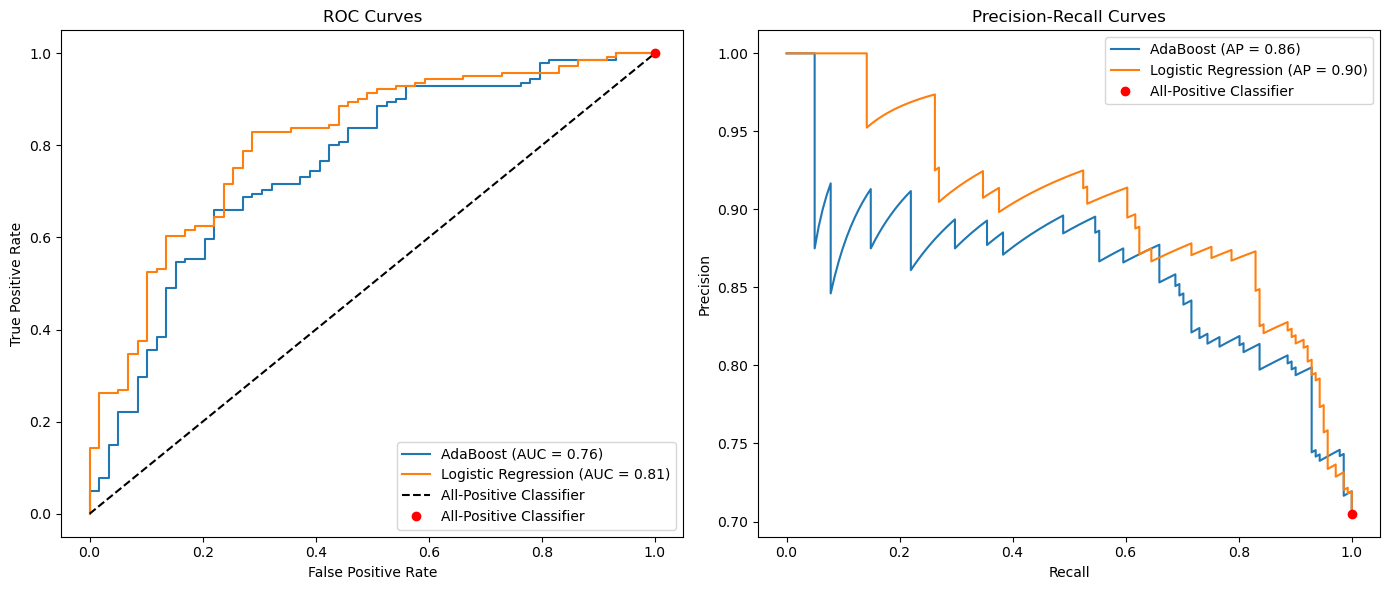

In [28]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score



X = df.drop('class', axis=1)  
y = df['class']  
y_numeric = y.map({'bad': 0, 'good': 1})
X = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.2, random_state=42)


ada_clf = AdaBoostClassifier(n_estimators=500, random_state=42)
log_reg = LogisticRegression(max_iter=5000, random_state=42)


ada_clf.fit(X_train, y_train)
log_reg.fit(X_train, y_train)


ada_probs = ada_clf.predict_proba(X_test)[:, 1]
log_reg_probs = log_reg.predict_proba(X_test)[:, 1]


ada_fpr, ada_tpr, _ = roc_curve(y_test, ada_probs)
ada_roc_auc = auc(ada_fpr, ada_tpr)

log_reg_fpr, log_reg_tpr, _ = roc_curve(y_test, log_reg_probs)
log_reg_roc_auc = auc(log_reg_fpr, log_reg_tpr)


ada_precision, ada_recall, _ = precision_recall_curve(y_test, ada_probs)
ada_ap = average_precision_score(y_test, ada_probs)

log_reg_precision, log_reg_recall, _ = precision_recall_curve(y_test, log_reg_probs)
log_reg_ap = average_precision_score(y_test, log_reg_probs)

all_positive_precision = y_test.mean()
all_positive_pr_point = (1, all_positive_precision)


plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(ada_fpr, ada_tpr, label=f'AdaBoost (AUC = {ada_roc_auc:.2f})')
plt.plot(log_reg_fpr, log_reg_tpr, label=f'Logistic Regression (AUC = {log_reg_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='All-Positive Classifier')
plt.plot(1, 1, 'ro', label='All-Positive Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(ada_recall, ada_precision, label=f'AdaBoost (AP = {ada_ap:.2f})')
plt.plot(log_reg_recall, log_reg_precision, label=f'Logistic Regression (AP = {log_reg_ap:.2f})')
plt.plot(all_positive_pr_point[0], all_positive_pr_point[1], 'ro', label='All-Positive Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()

plt.tight_layout()
plt.show()


For ROC:

The AdaBoost classifier has an AUC (Area Under the Curve) close to 1, indicating a high true positive rate across various false positive rates. The Logistic Regression classifier also performs well but with a slightly lower AUC than AdaBoost. The dashed line represents a random or an all-positive classifier, which classifies all the samples as positive, serving as a baseline where the true positive rate equals the false positive rate at all thresholds.

On the ROC Curve, an all-positive classifier has a true positive rate (TPR) of 1 and a false positive rate (FPR) of 1 because it classifies all instances as positive, identifying all actual positives (TPR = 1) but also incorrectly identifying all negatives as positives (FPR = 1). The red dot at the top right corner (1, 1) represents the all-positive classifier. 

For PR:

 In the PR plot, both classifiers are evaluated based on their precision and recall. AdaBoost shows a higher Average Precision (AP) compared to Logistic Regression, indicating better performance at different threshold levels.

The red dot's position on this plot illustrates the precision of the all-positive classifier at a recall of 1. The recall is 1, so the point on the PR curve for an all-positive classifier is determined based on the dataset's positive class proportion. 



## Problem 3 - Perceptron

### 3.1. Algo


In [29]:
import numpy as np


np.random.seed(42)

# Generate 10 random points 
train_data = np.random.rand(10, 2)
train_labels = np.array([1 if x[0] > x[1] else -1 for x in train_data])

# Generate 5000 random points
test_data = np.random.rand(5000, 2)
test_labels = np.array([1 if x[0] > x[1] else -1 for x in test_data])

(train_data[:5], train_labels[:5]), (test_data[:5], test_labels[:5])


((array([[0.37454012, 0.95071431],
         [0.73199394, 0.59865848],
         [0.15601864, 0.15599452],
         [0.05808361, 0.86617615],
         [0.60111501, 0.70807258]]),
  array([-1,  1,  1, -1, -1])),
 (array([[0.61185289, 0.13949386],
         [0.29214465, 0.36636184],
         [0.45606998, 0.78517596],
         [0.19967378, 0.51423444],
         [0.59241457, 0.04645041]]),
  array([ 1, -1, -1, -1,  1])))

In [39]:
def perceptron_train(X, Y, epochs=10, lr=1):
    # weights and bias
    w = np.zeros(X.shape[1])
    b = 0
    
    for _ in range(epochs):
        for x, y in zip(X, Y):
            if  (np.dot(w, x) + b ) * y <= 0: # notice: we change the sign here,
                # different from the original perceptron algorithm in the articles
                w += lr * x * y
                b += lr * y
            
    return w, b

def perceptron_predict(X, w, b):
    predictions = np.dot(X, w) + b # sign here
    return np.sign(predictions)

# Train the perceptron
w_perceptron, b_perceptron = perceptron_train(train_data, train_labels)


test_predictions_perceptron = perceptron_predict(test_data, w_perceptron, b_perceptron)


accuracy_perceptron = np.mean(test_predictions_perceptron == test_labels)

print(f'Perceptron accuracy: {accuracy_perceptron:.2f}')


Perceptron accuracy: 0.83


### 3.2 Hinge Loss func






In [38]:
def hinge_loss_train(X, Y, epochs=10, lr=1):

    w = np.zeros(X.shape[1])
    b = 0
    
    for _ in range(epochs):
        for x, y in zip(X, Y):
            # Calculate hinge loss condition
            if max(0,1-y*(np.dot(x, w) + b))> 0:
              
                w += lr * x * y
                b += lr * y
                
    return w, b

# Train the model using hinge-loss
w_hinge, b_hinge = hinge_loss_train(train_data, train_labels)

# Predict on the test set
test_predictions_hinge = perceptron_predict(test_data, w_hinge, b_hinge)

# Calculate accuracy
accuracy_hinge = np.mean(test_predictions_hinge == test_labels)

print(f'Hinge-loss accuracy: {accuracy_hinge:.2f}')


Hinge-loss accuracy: 0.98


### 3.3. Discussion

When hinge-loss for training, the model achieved an accuracy of 98%, compared to the perceptron criterion loss function model, which achieved an accuracy of 83%. Hinge-loss is better.

Hinge loss is better. This says about that the hinge-loss function, by focus on the margin between classes, provides a more robust criterion for this specific task, leading to better generalization on the test set. The hinge-loss model very likely benefits from its margin-based updates, which focus on not just correctly classifying the training points but doing so with a margin of confidence, thus enhancing the model's discrimination capability for this task. ​

### 3.4. Discussion

For perceptron criterion, it updates the weights only when it misclassifies a training example. This means it focuses solely on correcting wrong predictions without considering the margin or distance from the decision boundary. With only 10 training points, the perceptron model may overfit to these specific examples, especially if they are not representative of the overall distribution of the data. 

For hinge-loss function, not only aims to classify training examples correctly but also tries to maximize the margin (at least 1 in our case) between the classes. This encourages the model to find a more "central" decision boundary that separates the classes. It might be less sensitive to small changes in the training set. 

Therefore, hinge-loss is likely to result in classifications of the 5000 test instances that do not change significantly with a different set of 10 training points.

## Problem 4 - Linear Separability

Class 1: (−1, −1),(1, 1),(−3, −3),(4, 4)

Class 2:  (−1, 1),(1, −1),(−5, 2),(4, −8)

### 4.1. Plot

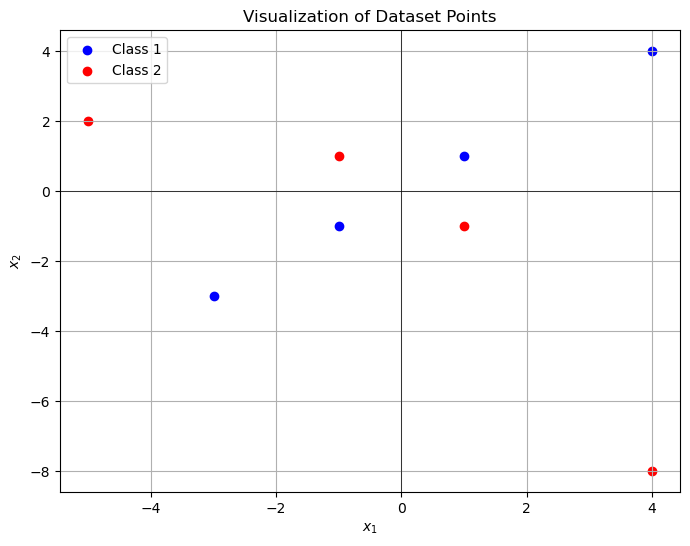

In [41]:
import matplotlib.pyplot as plt


class_1 = [(-1, -1), (1, 1), (-3, -3), (4, 4)]
class_2 = [(-1, 1), (1, -1), (-5, 2), (4, -8)]


x1_class_1, y1_class_1 = zip(*class_1)
x1_class_2, y1_class_2 = zip(*class_2)


plt.figure(figsize=(8, 6))
plt.scatter(x1_class_1, y1_class_1, color='blue', label='Class 1')
plt.scatter(x1_class_2, y1_class_2, color='red', label='Class 2')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Visualization of Dataset Points')
plt.legend()
plt.grid(True)
plt.show()


#### 4.1. Written Answer

We visualize the points and see if a single straight line can separate the two classes. And evidently, there is no single straight line that can separate Class 1 and Class 2 points. The dataset is not linearly separable (in the 2d space formed by $x_1$ and $x_2$).

### 4.2. z

Observing the dataset, a potential transformation could be the difference or the sum of $x_1$ and $x_2$. Given the symmetry of the points around the line $x_1 = x_2$ so the difference can be the answer here. Let $z$ denotes $z = x_1 - x_2$, then the data set is linear separable. 

### 4.3. Discussion

In the 1-dimensional space, the separating hyperplane (threshold) would be a value of $z$ that separates the transformed class points. we need to find a value of 
$z$ such that all points from one class are on one side of this value, and all points from the other class are on the opposite side. It could be any $z$ that satisfies this criteria.

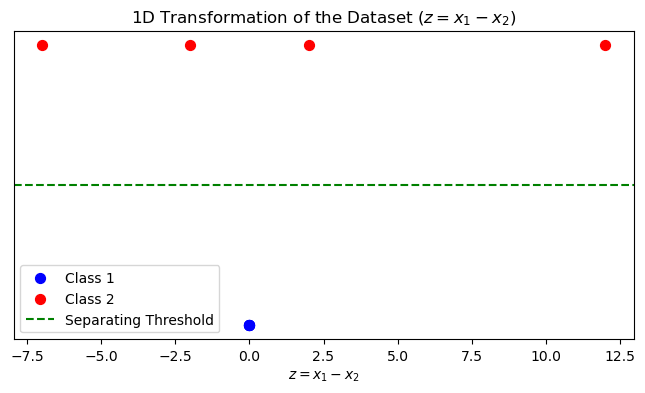

In [42]:

z_class_1 = [x1 - x2 for (x1, x2) in class_1]
z_class_2 = [x1 - x2 for (x1, x2) in class_2]

# For visualization of 1D to a more reasonable 2D, we assign a dummy y-value 
# # (0 for Class 1, 1 for Class 2) 
# just to plot them distinctly on y-axis

plt.figure(figsize=(8, 4))
plt.scatter(z_class_1, [0]*len(z_class_1), color='blue', label='Class 1', s=50)
plt.scatter(z_class_2, [1]*len(z_class_2), color='red', label='Class 2', s=50)
plt.axhline(0.5, color='green', linestyle='--', label='Separating Threshold')
plt.xlabel('$z = x_1 - x_2$')
plt.yticks([])
plt.title('1D Transformation of the Dataset ($z = x_1 - x_2$)')
plt.legend()
plt.show()


z_all = z_class_1 + z_class_2
labels_all = [1]*len(z_class_1) + [-1]*len(z_class_2)


z_sorted, labels_sorted = zip(*sorted(zip(z_all, labels_all)))
threshold_candidates = [(z_sorted[i] + z_sorted[i+1]) / 2 for i in range(len(z_sorted)-1)
                         if labels_sorted[i] != labels_sorted[i+1]]


### 4.4. Explanation

Basically, nonlinear transformations are important for improve the separability of data, allowing linear classifiers to be applied to more complex datasets. They enable the application of linear models to nonlinear problems by transforming the feature space in such a way that linear separation becomes possible, so, increase the applicability of these simpler models in to be solving complex classification tasks. ​